In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [13]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### Data Preparation -Phase-

In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
DT_bmi_pipe = Pipeline( steps=[ 
                        ('scale',StandardScaler()),
                        ('lr',DecisionTreeRegressor(random_state=42))
                    ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [16]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [17]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24492\3288176214.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
c:\Users\Future Line\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24492\3288176214.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9

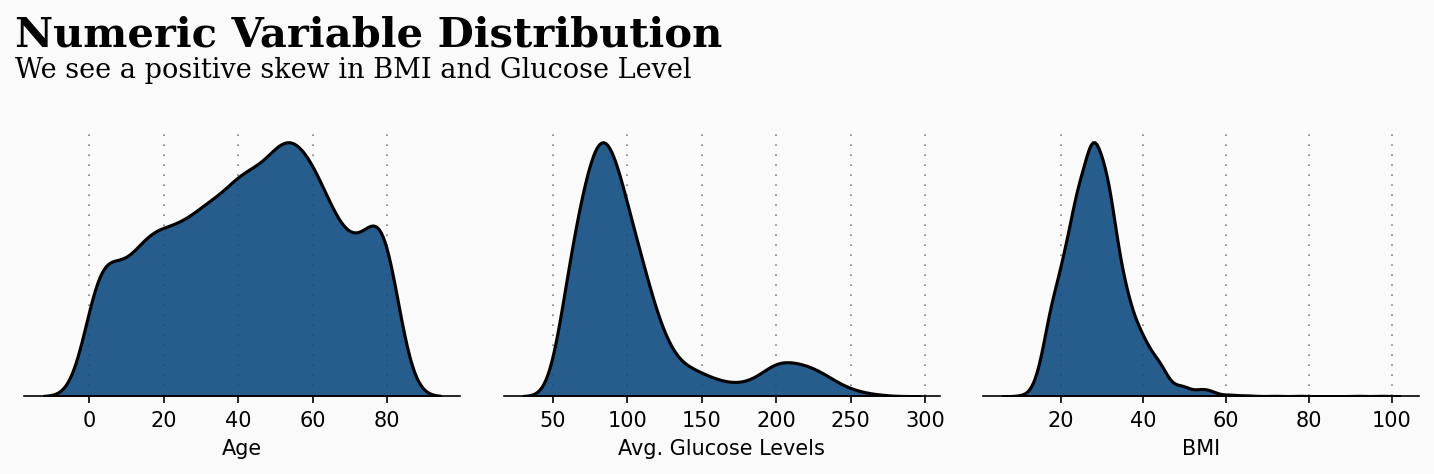

In [18]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()


C:\Users\Future Line\AppData\Local\Temp\ipykernel_24492\3610602098.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
c:\Users\Future Line\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24492\3610602098.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zo

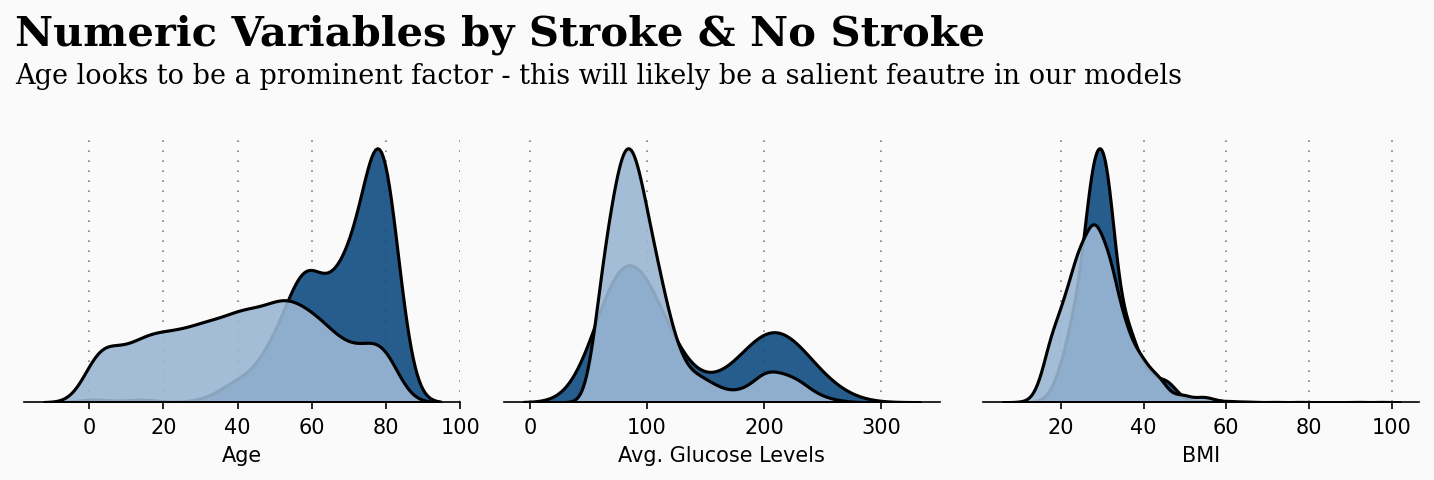

In [19]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

### Insight
Based on the above plots, it seems clear that Age is a big factor in stroke patients - the older you get the more at risk you are.

Though less obvious, there are also differences in Avg. Glucose Levels and BMI.

Let's explore those variables further...

In [20]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24492\2594018669.py:12: RuntimeWarning: invalid value encountered in scalar divide
  rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))
c:\Users\Future Line\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Future Line\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


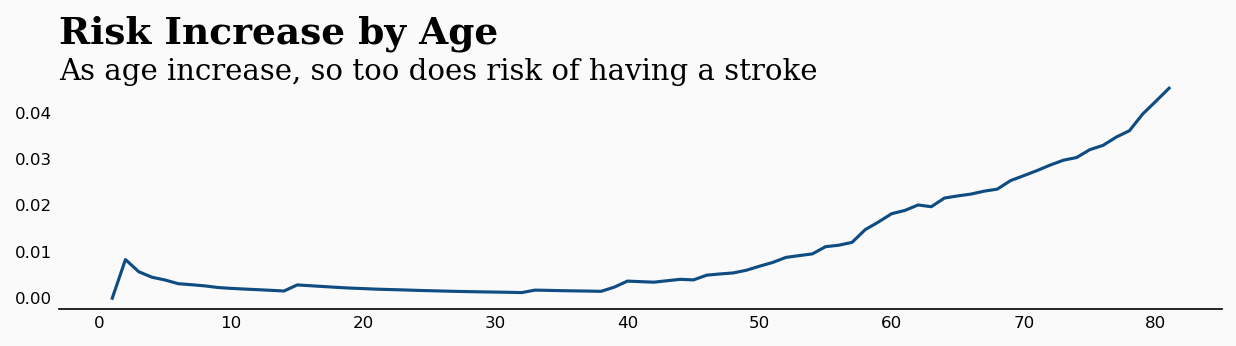

In [21]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

This confirms what our intuitions told us. The older you get, the more at risk you get.

However, you may have notices the low risk values on the y-axis. This is because the dataset is highly imbalanced.

Only 249 strokes are in our dataset which totals 5000 - around 1 in 20.

This needs to be considered when modelling of course, but also when formulating risk.

Strokes are still relatively rare, we are not saying anything is guaranteed, just that risk is increasing.

In [22]:
# Drop single 'Other' gender
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

In [23]:
no_str_only.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
67     Female  17.0  0             0              No            Private        Urban           92.97              28.5  formerly smoked  0         1
49196  Female  27.0  0             0              Yes           Private        Urban           127.28             23.4  Unknown          0         1
49179  Male    10.0  0             0              No            children       Rural           84.81              16.8  never smoked     0         1
49152  Female  40.0  0             0              No            Private        Rural           70.45              23.3  smokes           0         1
49120  Female  39.0  0             0              Yes           Govt_job       Rural           69.38              22.1  Unknown          0         1
                                                                                                               

In [24]:
no_str_only['gender'].value_counts()

gender
Female    2853
Male      2007
Name: count, dtype: int64

### General Overview
We've assessed a few variables so far, and gained some powerful insights.

I'll now plot several variables in one place, so we can spot interesting trends or features.

I will split the data in to 'Stroke' and 'No-Stroke' so we can see if these two populations differ in any meaningful way.

In [25]:
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

### Model preparation - Phase -

In [26]:
for column in df.columns:
    print(f"Column: {column}")
    print("Values and Counts:")
    print(df[column].value_counts())
    print("-" * 40)  # Separator for better readability

Column: id
Values and Counts:
id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
----------------------------------------
Column: gender
Values and Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------------------------
Column: age
Values and Counts:
age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64
----------------------------------------
Column: hypertension
Values and Counts:
hypertension
0    4612
1     498
Name: count, dtype: int64
----------------------------------------
Column: heart_disease
Values and Counts:
heart_disease
0    4834
1     276
Name: count, dtype: int64
----------------------------------------
Column: ever_married
Values and Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
---

In [27]:
for column in df.columns:
    print(f"{df[column].name} => Null values : {df[column].isnull().sum()} || NaN Values : {df[column].isna().sum()}")

id => Null values : 0 || NaN Values : 0
gender => Null values : 0 || NaN Values : 0
age => Null values : 0 || NaN Values : 0
hypertension => Null values : 0 || NaN Values : 0
heart_disease => Null values : 0 || NaN Values : 0
ever_married => Null values : 0 || NaN Values : 0
work_type => Null values : 0 || NaN Values : 0
Residence_type => Null values : 0 || NaN Values : 0
avg_glucose_level => Null values : 0 || NaN Values : 0
bmi => Null values : 0 || NaN Values : 0
smoking_status => Null values : 0 || NaN Values : 0
stroke => Null values : 0 || NaN Values : 0


In [28]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.int8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.int8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.int8)

In [29]:
for column in df.columns:
        print(f"Column: {column}")
        print("Values and Counts:")
        print(df[column].value_counts())
        print("-" * 40)  # Separator for better readability

Column: id
Values and Counts:
id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
----------------------------------------
Column: gender
Values and Counts:
gender
1    2994
0    2115
2       1
Name: count, dtype: int64
----------------------------------------
Column: age
Values and Counts:
age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64
----------------------------------------
Column: hypertension
Values and Counts:
hypertension
0    4612
1     498
Name: count, dtype: int64
----------------------------------------
Column: heart_disease
Values and Counts:
heart_disease
0    4834
1     276
Name: count, dtype: int64
----------------------------------------
Column: ever_married
Values and Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------

In [30]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


## Used Columns for input : 
'gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi'

## Input Data Types : 

In [31]:
df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']].dtypes

gender                  int8
age                    int32
hypertension           int64
heart_disease          int64
work_type               int8
avg_glucose_level    float64
bmi                  float64
dtype: object

## all potential values for each input column :


In [32]:
df[['avg_glucose_level','bmi']].value_counts()

avg_glucose_level  bmi 
89.68              38.7    2
96.84              30.2    2
67.92              31.1    2
81.59              27.2    2
57.56              27.5    2
                          ..
82.07              30.4    1
                   29.0    1
82.06              35.2    1
82.05              21.0    1
271.74             31.1    1
Name: count, Length: 5105, dtype: int64

In [33]:
df[['gender','age','hypertension','heart_disease','work_type']].value_counts()

gender  age  hypertension  heart_disease  work_type
1       23   0             0              0            42
        1    0             0              3            42
        45   0             0              0            41
        40   0             0              0            37
        32   0             0              0            37
                                                       ..
        36   1             0              0             1
        35   1             0              0             1
0       46   0             1              0             1
                                          2             1
2       26   0             0              0             1
Name: count, Length: 819, dtype: int64

In [34]:
df['work_type'].value_counts()

work_type
0    2925
1     819
3     687
2     657
4      22
Name: count, dtype: int64

In [35]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [36]:
df.shape

(5110, 12)

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']


In [39]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['stroke'] = y_resampled

In [40]:
X_resampled.shape

(9722, 7)

In [41]:
df_resampled['stroke'].value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

## Remember ! :
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.int8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.int8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.int8)

In [50]:
from sklearn.model_selection import train_test_split
X = df_resampled.drop(columns=["stroke"])  # Replace "target" with your actual target column name
y = df_resampled["stroke"]


# Initialize StandardScaler
scaler = StandardScaler()

# Scale the entire feature set before splitting
X_scaled = scaler.fit_transform(X)

# Split the scaled data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (7777, 7), Test set size: (1945, 7)


In [56]:
import joblib
joblib.dump(scaler, 'scaler-Stroke_ESolved.pkl')

['scaler-Stroke_ESolved.pkl']

In [51]:
X_train

array([[-0.91361157,  0.77016062, -0.29780834, ..., -0.61627892,
         2.03921652,  0.8109002 ],
       [-0.91361157,  0.45290129, -0.29780834, ..., -0.61627892,
         1.99337863,  0.51657649],
       [ 1.09364983,  0.95145167, -0.29780834, ...,  0.47129844,
         1.29711195,  0.46957923],
       ...,
       [-0.91361157,  1.0420972 , -0.29780834, ..., -0.61627892,
        -0.06981058, -0.53876027],
       [-0.91361157,  0.36225577, -0.29780834, ..., -0.61627892,
        -0.12450752,  0.14034838],
       [ 1.09364983, -0.54419948, -0.29780834, ..., -0.61627892,
        -1.09223088, -0.17049292]])

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Initialize models
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gnb = GaussianNB()

# Train models
gbm.fit(X_train, y_train)
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

# Probabilities for ROC AUC
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]

# Evaluate models
def evaluate_model(name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Print results
evaluate_model("Gradient Boosting", y_test, y_pred_gbm, y_prob_gbm)
evaluate_model("Gaussian Naïve Bayes", y_test, y_pred_gnb, y_prob_gnb)



Gradient Boosting Performance:
Accuracy: 0.8555
Precision: 0.8411
Recall: 0.8765
F1 Score: 0.8584
ROC AUC Score: 0.9243

Gaussian Naïve Bayes Performance:
Accuracy: 0.8010
Precision: 0.7595
Recall: 0.8807
F1 Score: 0.8156
ROC AUC Score: 0.8631


In [53]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")


### 🌟 Optimized Gradient Boosting (GBM)
gbm_params = {'n_estimators': [100, 300], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
grid_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), gbm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gbm.fit(X_train, y_train)

best_gbm = grid_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)
y_prob_gbm = best_gbm.predict_proba(X_test)[:, 1]
evaluate_model("Optimized Gradient Boosting", y_test, y_pred_gbm, y_prob_gbm)

### 🌟 Gaussian Naïve Bayes (GNB) - No Hyperparameter Tuning
gnb = GaussianNB(var_smoothing=1e-9)  # Default is already optimized
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
evaluate_model("Gaussian Naïve Bayes", y_test, y_pred_gnb, y_prob_gnb)

### 🌟 Optimized Random Forest (RF)
rf_params = {'n_estimators': [100, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
evaluate_model("Optimized Random Forest", y_test, y_pred_rf, y_prob_rf)


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Optimized Gradient Boosting Performance:
Accuracy: 0.9213
Precision: 0.9042
Recall: 0.9424
F1 Score: 0.9229
ROC AUC Score: 0.9695

Gaussian Naïve Bayes Performance:
Accuracy: 0.8010
Precision: 0.7595
Recall: 0.8807
F1 Score: 0.8156
ROC AUC Score: 0.8631
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Optimized Random Forest Performance:
Accuracy: 0.9254
Precision: 0.9066
Recall: 0.9486
F1 Score: 0.9271
ROC AUC Score: 0.9785


In [54]:
best_rf

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

### Random Forest is the most performer

In [55]:
import joblib

# Save the model pipeline to a file
model_filename = 'RandomForest_Stroke-model_ESolved.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to RandomForest_Stroke-model_ESolved.pkl


## Imbalanced Dataset >>